In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import layers

In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [25]:
(train_images,train_label),(test_images,test_labels) = fashion_mnist.load_data()

In [26]:
class_label = ['T-Shirt','Trousure','PullOver','Dress','Coat','Sandle','Shirt','Sneaker','Bag','Ankle boot']

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
train_label.shape

(60000,)

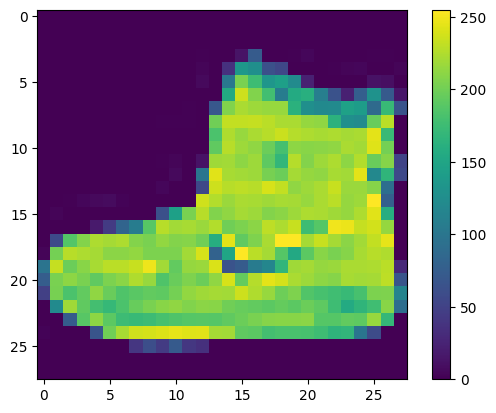

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

In [30]:
train_images = train_images/255.0
test_images = test_images/255.0

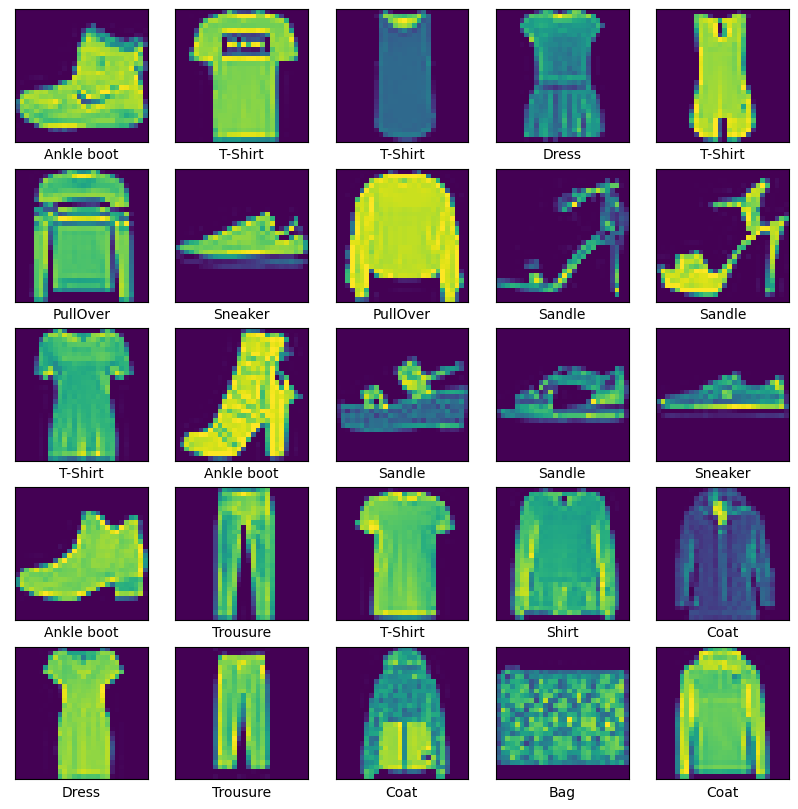

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_label[train_label[i]])

In [32]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))


In [34]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(train_images,train_label,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5018 - accuracy: 0.8233
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3798 - accuracy: 0.8624
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3401 - accuracy: 0.8770
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3133 - accuracy: 0.8845
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2959 - accuracy: 0.8912
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2809 - accuracy: 0.8957
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2682 - accuracy: 0.8997
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2593 - accuracy: 0.9035
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2475 - accuracy: 0.9076
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [39]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy: ",test_accuracy)
print("Test loss: ",test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.4146 - accuracy: 0.8862
Test Accuracy:  0.8862000107765198
Test loss:  0.41459813714027405


In [40]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [41]:
predictions = probability_model.predict(test_images)

In [42]:
predictions[0]

array([7.3761094e-11, 8.6221411e-16, 1.8820404e-17, 1.6824980e-19,
       9.4730957e-19, 5.7364367e-08, 1.4497241e-11, 6.1867945e-04,
       1.3863016e-16, 9.9938118e-01], dtype=float32)

In [43]:
test_labels[70]

7

In [44]:
predicted_label=np.argmax(predictions[70])
predicted_label

7

Text(0.5, 0, 'Sneaker')

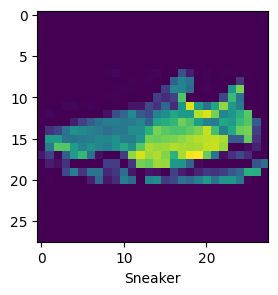

In [48]:
plt.figure(figsize=(6,3))
plt.imshow(test_images[70])
plt.xlabel(class_label[predicted_label])